<a href="https://colab.research.google.com/github/Mahg39/Python/blob/main/AI_trading_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn yfinance ccxt MetaTrader5 backtrader tensorflow scikit-learn

  Using cached ccxt-4.4.62-py2.py3-none-any.whl.metadata (130 kB)
ERROR: Could not find a version that satisfies the requirement MetaTrader5 (from versions: none)
ERROR: No matching distribution found for MetaTrader5


In [1]:
!pip install yfinance


[*********************100%***********************]  1 of 1 completed

Price                       Close    High     Low    Open Volume
Ticker                       GC=F    GC=F    GC=F    GC=F   GC=F
Datetime                                                        
2025-02-17 08:00:00+03:00  2907.6  2916.5  2907.5  2910.3      0
2025-02-17 09:00:00+03:00  2909.0  2910.9  2900.6  2907.4   4791
2025-02-17 10:00:00+03:00  2914.3  2915.4  2908.4  2909.0   3592
2025-02-17 11:00:00+03:00  2912.0  2914.5  2907.8  2914.2   4410
2025-02-17 12:00:00+03:00  2914.3  2919.0  2912.1  2912.3   4981


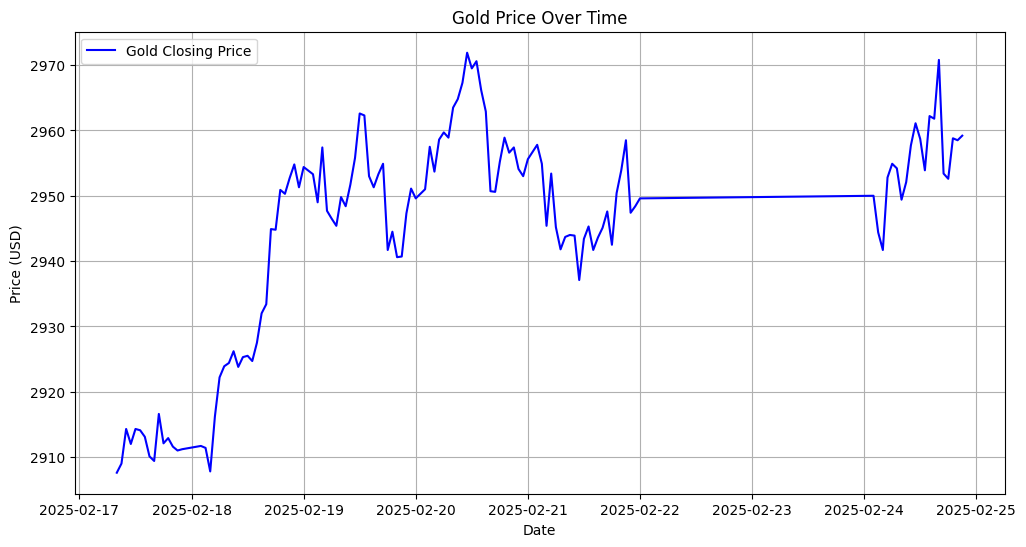

In [4]:
# Import the necessary libraries.
# 'yfinance' helps get market data from Yahoo Finance.
# 'pandas' is used to handle data in Dataframes format, which is very
   #-convienient for analysis.

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


#getting historical gold price data
#"GC=F" is the ticker for Gold Futures
gold_data = yf.download("GC=F", interval="1h", period="7d")


#Convert to Dataframe
#df = pd.Dataframe(bars, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

#Convert time to UTC+3
gold_data.index = gold_data.index.tz_convert('Africa/Nairobi') #Nairobi timezone (UTX+3)
#df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

# Round Prices to 2 decimal places
gold_data = gold_data.round(2)

# Print first 5 rows
print(gold_data.head())

#Plot the closing price to visualize the trend over time.
# Matplotlib is used for plotting; we set the figure size for clarity.
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Close'], label='Gold Closing Price', color='blue')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

